In [1]:
import cwgp
import warnings
warnings.filterwarnings('ignore')

print(cwgp)

from cwgp.cwgp import CWGP
from cwgp.transformations import sal,sa,asinh,box_cox
import seaborn as sns
import autograd.numpy as np

<module 'cwgp' from '/home/chen/work/venv/lib/python3.6/site-packages/cwgp/__init__.py'>


In [2]:
betas = np.random.exponential(scale=5,size=100)
betas = betas[np.newaxis].reshape(-1,1)

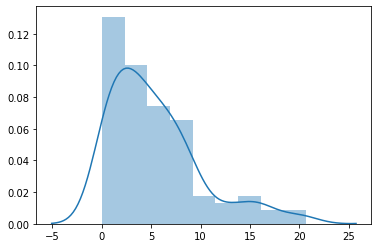

In [3]:
sns.distplot(betas)

# SAL d=1

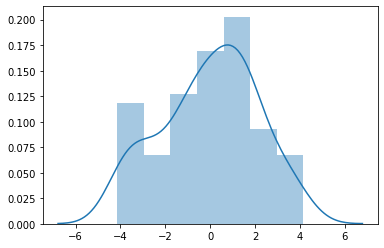

In [4]:
compgp = CWGP(sal, betas, transformations=1)
model = compgp.fit()
transformed_betas, d = compgp.phi.comp_phi(model.x)
sns.distplot(transformed_betas)

# Arcsinh d=2

In [ ]:
compgp = CWGP(asinh, betas, transformations=2)
model = compgp.fit()
transformed_betas, d = compgp.phi.comp_phi(model.x)
sns.distplot(transformed_betas)

# Sinh-Arcsinh d=3

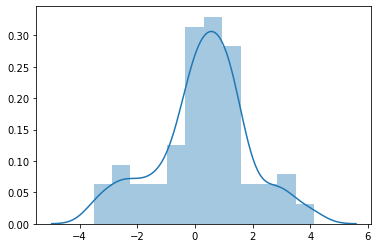

In [6]:
compgp = CWGP(sa, betas, transformations=3)
model = compgp.fit()
transformed_betas, d = compgp.phi.comp_phi(model.x)
sns.distplot(transformed_betas)

# Box-Cox d=4

In [ ]:
compgp = CWGP(box_cox, betas, transformations=4)
model = compgp.fit()
transformed_betas, d = compgp.phi.comp_phi(model.x)
sns.distplot(transformed_betas)